In [1]:
%load_ext autoreload
%autoreload 2

from os import pardir, getcwd
from os.path import join, abspath, normpath, basename

rootDirectory = abspath(join(getcwd(), pardir))
dataDirectory = join(rootDirectory, 'data')
modelDirectory = join(rootDirectory, 'models')
currentSensorsh = ('https://raw.githubusercontent.com/fablabbcn/smartcitizen-kit-20/master/lib/Sensors/Sensors.h')

# `do not disturb` mode
import warnings                                  
warnings.filterwarnings('ignore')

## Create a button that hides cells
from IPython.display import HTML, display, clear_output, Markdown
from ipywidgets import interact
import ipywidgets as widgets

from src.data.recording_class import recordings
from src.data.test_utils import getSensorNames
currentSensorNames = getSensorNames(currentSensorsh, join(dataDirectory, 'interim'))

import matplotlib.pyplot as plot
plot.style.use('seaborn')
%matplotlib inline

# Initialise recordings
records = recordings()

print ('Notebook initialisation -> OK')

Loaded updated sensor names and dumped into /Users/macoscar/Documents/04_Projects/02_FabLab/01_SmartCitizen/01_Repositories/DataAnalysis/smartcitizen-iscape-data/data/interim/sensorNames.sav
Notebook initialisation -> OK


In [2]:
from src.data.test_utils import getTests
from src.data.api_utils import getKitID
import re

out_load = widgets.Output()

selectedTest = tuple()
def selectTests(x):
    global selectedTest
    selectedTest = list(x)
    selectedTestBases = list()
    selectedTestBases.append('')
    for test in selectedTest:
        selectedTestBases.append(basename(normpath(test)))
    name_drop_api.options = selectedTestBases
            
def loadButton(b):
    with out_load:
        clear_output()
        
        target_raster_csv = raster_text_csv.value + raster_drop_csv.value
        if na_drop_csv.value != 'None':
            na_drop_action = na_drop_csv.value
            na_dropage = True
        else:
            na_dropage = False
            na_drop_action = ''
        for testCSV in selectedTest:
            testName = basename(normpath(testCSV))
            records.add_recording_CSV(testName, testCSV, currentSensorNames, target_raster_csv, na_dropage, na_drop_action)
        
        
        if kitList_api.value != '':
            target_raster_api = raster_text_api.value + raster_drop_api.value
            devices = kitList_api.value.strip('').split(',')
            devicesCorrected = list()
            
            for device in devices: 
                device = re.sub(' ', '', device)
                devicesCorrected.append(device)
            
            if name_drop_api.value == '':
                testName = testName_api.value
                print (testName)

            else:
                testName = name_drop_api.value
            
            if testName != '':
                if na_drop_api.value != 'None':
                    na_drop_action = na_drop_api.value
                    na_dropage = True
                else:
                    na_dropage = False
                    na_drop_action = ''
                records.add_recording_API(testName, devicesCorrected, currentSensorNames, start_date_widget_api.value, end_date_widget_api.value, \
                                          target_raster_api, dataDirectory)
       
        unload_drop.options = records.readings.keys()
        
def clearButton(b):
    with out_load:
        clear_output()
        records.clear_recordings()
        unload_drop.options = records.readings.keys()
        
def clearAPI(b):
    with out_load:
        clear_output()
        kitList_api.value = ''
        testName_api.value = ''
        
def reload_list(b):
    with out_load:
        clear_output()
        global tests
        tests = getTests(dataDirectory)

def clearSelButton(b):
    with out_load:
        clear_output()
        records.del_recording(unload_drop.value)
        unload_drop.options = records.readings.keys()
        if len(records.readings.keys()) > 0:
            print ('Current recordings list:')
            for reading in records.readings.keys():
                print ('\t',reading)
        else:
            print ('Current recordings list is empty')
        
## API
banner_api = widgets.HTML('<h3>Import API Tests</h3>')
kitList_api = widgets.Text(description = 'Kit List')
testName_api = widgets.Text(description = 'Test Name')

name_drop_api = widgets.Dropdown(options = selectedTest,
                                  description = 'Merge with CSV',
                                  layout = widgets.Layout(width='300px'))

raster_text_api = widgets.Text(description = 'Target Raster',
                              value = '1',
                              layout = widgets.Layout(width='300px'))

raster_drop_api = widgets.Dropdown(options = ['H', 'Min', 'S'],
                                  value = 'Min',
                                  description = '',
                                  layout = widgets.Layout(width='100px'))

na_drop_api = widgets.Dropdown(options = ['None', 'fill', 'drop'],
                                  value = 'fill',
                                  description = 'Process na',
                                  layout = widgets.Layout(width='200px'))

clearAPIB = widgets.Button(description = 'Clear')
clearAPIB.on_click(clearAPI)

start_date_widget_api = widgets.DatePicker(description='Start Date')
end_date_widget_api = widgets.DatePicker(description='End Date')
dateBox_api = widgets.VBox([start_date_widget_api, end_date_widget_api, clearAPIB])

raster_box_api = widgets.HBox([raster_text_api, raster_drop_api, na_drop_api])
namebox_api = widgets.HBox([testName_api, name_drop_api])
Hbox_api = widgets.VBox([kitList_api, namebox_api])
apiBox = widgets.VBox([banner_api, Hbox_api, raster_box_api, dateBox_api])
        
## CSV
reload_list_button = widgets.Button(description='Reload List')
reload_list_button.on_click(reload_list)

display(widgets.HTML('<h2>Test load</h2>'))
display(widgets.HBox([widgets.HTML('<h3>Import CSV Tests</h3>')]),#, reload_list_button]),
       layout = widgets.Layout(justify='space-between'))

tests = getTests(dataDirectory)

interact(selectTests,
         x = widgets.SelectMultiple(options=tests, 
                           selected_labels = selectedTest, 
                           layout=widgets.Layout(width='600px')))

raster_text_csv = widgets.Text(description = 'Target Raster',
                              value = '1',
                              layout = widgets.Layout(width='300px'))

raster_drop_csv = widgets.Dropdown(options = ['H', 'Min', 'S', 'ms'],
                                  value = 'Min',
                                  description = '',
                                  layout = widgets.Layout(width='100px'))

na_drop_csv = widgets.Dropdown(options = ['None', 'fill', 'drop'],
                                  value = 'fill',
                                  description = 'Process na',
                                  layout = widgets.Layout(width='200px'))

raster_box_csv = widgets.HBox([raster_text_csv, raster_drop_csv, na_drop_csv])

# buttonBox_csv = widgets.HBox([loadB_csv, resetB_csv])
csvBox = widgets.VBox([raster_box_csv])#, buttonBox_csv])

loadB = widgets.Button(description='Load')
loadB.on_click(loadButton)

resetB = widgets.Button(description='Clear All')
resetB.on_click(clearButton)

unload_drop = widgets.Dropdown(options = records.readings.keys(),
                                  layout = widgets.Layout(width='200px'))

resetOneB = widgets.Button(description='Clear Selected')
resetOneB.on_click(clearSelButton)

buttonBox = widgets.HBox([loadB, resetB, unload_drop, resetOneB])
# Display everything
display(csvBox)
display(apiBox)
display(widgets.HTML('<hr>'))
display(buttonBox)
display(out_load)

HTML(value='<h2>Test load</h2>')

interactive(children=(SelectMultiple(description='x', layout=Layout(width='600px'), options={'2017-06_INT_FIRM…

HTML(value='<hr>')

Output()

,TEMP,HUM,PRESS,EXT_PN_5,EXT_PM_A_1,EXT_PM_A_25,EXT_PM_A_10,EXT_PN_A_03,EXT_PN_A_05,EXT_PN_A_1,...,EXT_PM_B_1,EXT_PM_B_25,EXT_PM_B_10,EXT_PN_B_03,EXT_PN_B_05,EXT_PN_B_1,EXT_PN_B_25,EXT_PN_B_5,EXT_PN_B_10,PM_DALLAS_TEMP
TIME,,,,,,,,,,,,,,,,,,,,,
2019-01-22 11:50:00+01:00,25.19,26.23,101.33,1.0,9.0,13.0,13.0,1656.0,465.0,69.0,...,3.0,7.0,10.0,588.0,192.0,51.0,8.0,2.0,0.0,24.06
2019-01-22 11:51:00+01:00,25.17,25.20,101.33,0.0,9.0,11.0,11.0,1788.0,451.0,56.0,...,8.0,9.0,9.0,1284.0,370.0,30.0,2.0,0.0,0.0,24.12
2019-01-22 11:52:00+01:00,24.99,27.12,101.32,0.0,12.0,17.0,17.0,3192.0,606.0,79.0,...,11.0,15.0,15.0,2697.0,561.0,64.0,6.0,0.0,0.0,24.06
2019-01-22 11:53:00+01:00,24.99,25.14,101.32,0.0,8.0,11.0,12.0,1605.0,443.0,58.0,...,7.0,11.0,12.0,1557.0,386.0,52.0,2.0,0.0,0.0,24.12


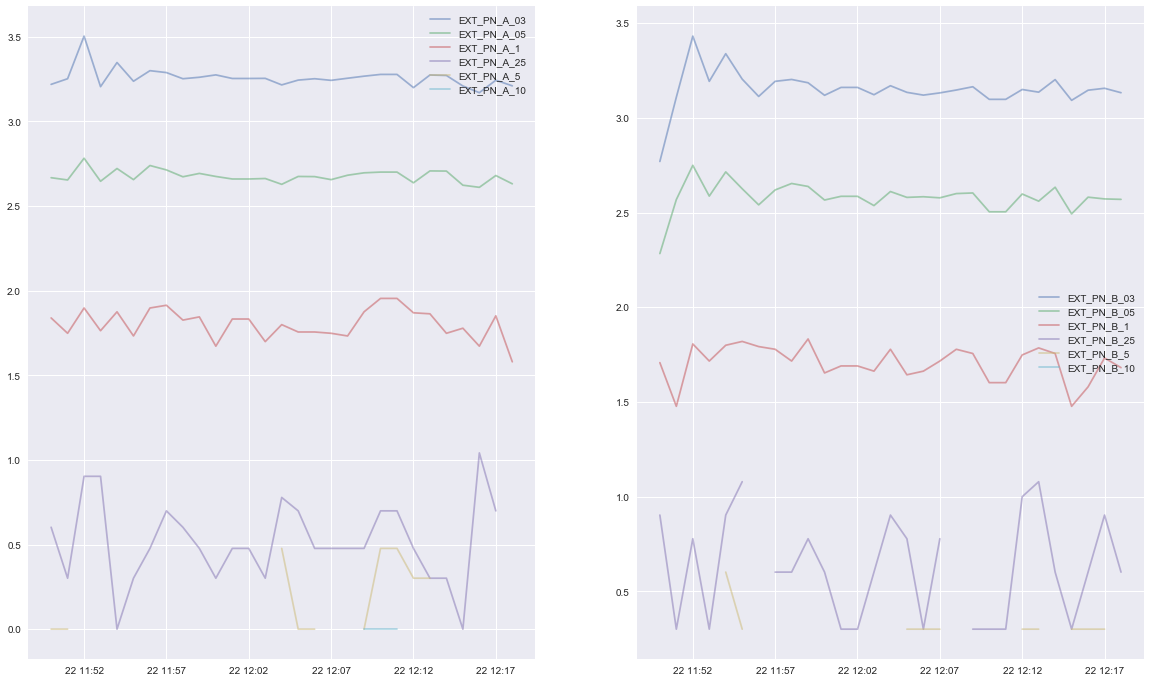

In [502]:
import re
import numpy as np
import matplotlib.pyplot as plot
from matplotlib import gridspec
import pandas as pd

# data = pd.read_csv('/Users/macoscar/Documents/04_Projects/02_FabLab/01_SmartCitizen/01_Repositories/DataAnalysis/smartcitizen-iscape-data/data/processed/2019/01/2019-01_INT_PM_PN_ANALYSIS/RAW_DATA/19-01-22.csv', 
#                    delimiter=',', skiprows=range(1,4))
# data.set_index('TIME', inplace=True)
# Set index
# data.index = pd.to_datetime(data.index).tz_localize('UTC').tz_convert('Europe/Madrid')

dict_trials = dict()
PRE = 'EXT_PN'
SENSOR = ['A', 'B']
DENSITY = 1.65 # g/cm3

dataframe = records.readings['2019-01_INT_PM_PN_ANALYSIS']['devices']['STATION']['data'].copy()

dataframe.drop(['BATT', 'LIGHT', 'NOISE_A', 'PM_1', 'PM_25',
       'PM_10', 'PM_1UAE', 'PM_25UAE', 'PM_10UAE', 'PN_03', 'PN_05', 'PN_1',
       'PN_25', 'PN_5', 'PN_10', 'GB_1A', 'GB_1W', 'GB_2A', 'GB_2W', 'GB_3A',
       'GB_3W', 'GB_TEMP', 'GB_HUM', 'EXT_PM_1', 'EXT_PM_25', 'EXT_PM_10','EXT_PN_03', 'EXT_PN_05', 'EXT_PN_1', 'EXT_PN_25', 'EXT_PN_10',
        'EXT_PM_10','EXT_PM_1UAE', 'EXT_PM_25UAE', 'EXT_PM_10UAE','EXT_PM_A_1UAE', 'EXT_PM_A_25UAE', 'EXT_PM_A_10UAE', 'EXT_PM_B_1UAE', 'EXT_PM_B_25UAE', 'EXT_PM_B_10UAE'], axis=1, inplace=True)

display(dataframe.head(4))

gs = gridspec.GridSpec(1, 2)
fig = plot.figure(figsize=(20,12))
fig.tight_layout()

ax = fig.add_subplot(gs[0])
plot.plot(dataframe.index, np.log10(dataframe['EXT_PN_A_03']), label = 'EXT_PN_A_03', alpha = 0.5)
plot.plot(dataframe.index, np.log10(dataframe['EXT_PN_A_05']), label = 'EXT_PN_A_05',  alpha = 0.5)
plot.plot(dataframe.index, np.log10(dataframe['EXT_PN_A_1']), label = 'EXT_PN_A_1', alpha = 0.5)
plot.plot(dataframe.index, np.log10(dataframe['EXT_PN_A_25']), label = 'EXT_PN_A_25', alpha = 0.5)
plot.plot(dataframe.index, np.log10(dataframe['EXT_PN_A_5']), label = 'EXT_PN_A_5', alpha = 0.5)
plot.plot(dataframe.index, np.log10(dataframe['EXT_PN_A_10']), label = 'EXT_PN_A_10', alpha = 0.5)
plot.legend(loc = 'best')

ax = fig.add_subplot(gs[1])
plot.plot(dataframe.index, np.log10(dataframe['EXT_PN_B_03']), label = 'EXT_PN_B_03', alpha = 0.5)
plot.plot(dataframe.index, np.log10(dataframe['EXT_PN_B_05']), label = 'EXT_PN_B_05',  alpha = 0.5)
plot.plot(dataframe.index, np.log10(dataframe['EXT_PN_B_1']), label = 'EXT_PN_B_1', alpha = 0.5)
plot.plot(dataframe.index, np.log10(dataframe['EXT_PN_B_25']), label = 'EXT_PN_B_25', alpha = 0.5)
plot.plot(dataframe.index, np.log10(dataframe['EXT_PN_B_5']), label = 'EXT_PN_B_5', alpha = 0.5)
plot.plot(dataframe.index, np.log10(dataframe['EXT_PN_B_10']), label = 'EXT_PN_B_10', alpha = 0.5)
plot.legend(loc = 'best')

In [544]:
from src.models.formula_utils import maxer_hist, miner, maxer

# CONSTANTS
DENSITY = 1.65
MIN_THD_COUNT = 5
K_KOHLER = 0.62 # MIXPO
MIN_EFFLO_RH = 35

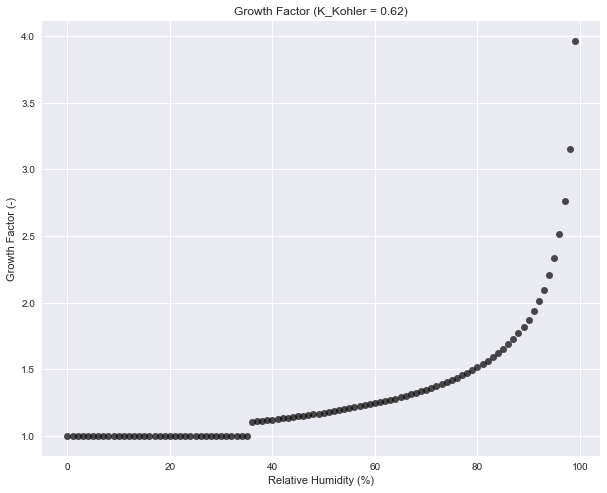

In [545]:
## Plot Correction
df = pd.DataFrame()
df['humidity_example'] = np.arange(0,100,1)

def grow_factor_calc (row):
    return np.power(1 + K_KOHLER * row/(100-row), 1.0/3)

df['growth_factor_example'] = df.apply(lambda row: grow_factor_calc(row['humidity_example']) if (row['humidity_example'] > MIN_EFFLO_RH) else 1, axis = 1)

fig = plot.figure(figsize=(10,8))
plot.plot(df.humidity_example, df.growth_factor_example, 'ko', alpha = 0.7)
plot.xlabel('Relative Humidity (%)')
plot.ylabel('Growth Factor (-)')
plot.title('Growth Factor (K_Kohler = {})'.format(K_KOHLER))
plot.grid(True)
plot.show()

In [547]:
def calculate_fraction(bins):

    fraction = np.zeros([bins.shape[0], bins.shape[1], HARD_LOWER_LIMITS.shape[0]])
    
    # Change this to numpy broadcasting
    for k in range(fraction.shape[0]):
        for i in range(fraction.shape[1]-1):
            for j in range(fraction.shape[2]):
                if (bins[k, i]>=HARD_UPPER_LIMITS[j]):
                    fraction[k, i, j] = 0
                elif bins[k, i+1]<=HARD_UPPER_LIMITS[j]:
                    fraction[k, i, j] = 1
                else:
                    fraction[k, i, j] = (HARD_UPPER_LIMITS[j]-bins[k, i])/(bins[k, i+1]-bins[k, i])
                
                # print (bins[k, i], bins[k, i+1], HARD_LOWER_LIMITS[j], HARD_UPPER_LIMITS[j], fraction[k, i, j])
            
    return fraction

In [552]:
HARD_LOWER_LIMITS = np.array([0, 1, 2.5])
HARD_UPPER_LIMITS = np.array([1, 2.5, 10])
# BINS ARE BETWEEN VALUE and VALUE + 1
BINS_NAME = ["03", "05", "1", "25", "5", "10"]
BINS = np.array([0.3, 0.5, 1.0, 2.5, 5.0, 10.0]) #um
BINS = BINS.reshape(1, BINS.shape[0])
BINS_RAW = BINS*np.ones([data_modify.shape[0],1])

# Calculate Raw fraction
fraction_raw = calculate_fraction(BINS_RAW)

BINS_DI = BINS.copy()
HARD_LOWER_LIMITS = np.array([0.0, 1.0, 2.5])
HARD_UPPER_LIMITS = np.array([1.0, 2.5, 10.0])

## Not clear whether Di should be between bins or not
for i in range(BINS.shape[1]-1):
    BINS_DI[0, i] = (BINS[0, i]+BINS[0, i+1])/2
MASS_DI = np.pi/6.0 * np.power(BINS_DI, 3) * DENSITY * 1.0/1e6 #ug

print('BINS_NAME', BINS_NAME)
print('BINS', BINS)
print('BINS_DI', BINS_DI)
print('MASS_DI', MASS_DI)

data_modify = dataframe.copy()
# Just for the shake of testing
data_modify['HUM'] = data_modify['HUM']*2

data_modify['growth_factor'] = data_modify.apply(lambda row: grow_factor_calc(row['HUM']) if (row['HUM'] > MIN_EFFLO_RH) else 0, axis = 1)

# Calculate new particle diameter bins
bins_cor = (BINS.T / data_modify['growth_factor'][:,None].T).T
bins_di_cor = (BINS_DI.T / data_modify['growth_factor'][:,None].T).T
fraction_cor = calculate_fraction(bins_cor)

# Calculate mass based on that new diamater
mass_di_cor = np.round(np.pi/6.0 * np.power(bins_di_cor, 3) * DENSITY * shape_factor, 5) * 1.0/1e6 #ug

BINS_NAME ['03', '05', '1', '25', '5', '10']
BINS [[ 0.3  0.5  1.   2.5  5.  10. ]]
BINS_DI [[ 0.4   0.75  1.75  3.75  7.5  10.  ]]
MASS_DI [[5.52920307e-08 3.64473835e-07 4.63016761e-06 4.55592294e-05
  3.64473835e-04 8.63937980e-04]]


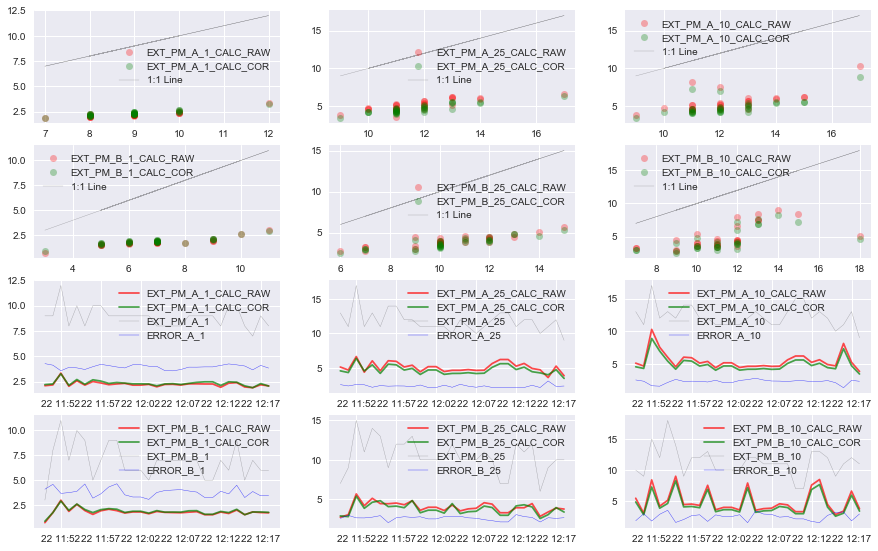

In [560]:
i = 0

gs = gridspec.GridSpec(5, 3)
fig = plot.figure(figsize=(15,12))

fig.tight_layout()
absolute_assumption_PN = True #As stated in the datasheet

for sensor in SENSOR:
    
    # CALCULATE ACTUAL PARTICLE NUMBERS
    if absolute_assumption_PN:
        data_modify[PRE + '_' + sensor + '_03_ABS'] = maxer_hist(data_modify[PRE + '_' + sensor + '_03'] - data_modify[PRE + '_' + sensor + '_05'], MIN_THD_COUNT, 0)
        data_modify[PRE + '_' + sensor + '_05_ABS'] = maxer_hist(data_modify[PRE + '_' + sensor + '_05'] - data_modify[PRE + '_' + sensor + '_1'], MIN_THD_COUNT, 0)
        data_modify[PRE + '_' + sensor + '_1_ABS'] = maxer_hist(data_modify[PRE + '_' + sensor + '_1'] - data_modify[PRE + '_' + sensor + '_25'], MIN_THD_COUNT, 0)
        data_modify[PRE + '_' + sensor + '_25_ABS'] = maxer_hist(data_modify[PRE + '_' + sensor + '_25'] - data_modify[PRE + '_' + sensor + '_5'], MIN_THD_COUNT, 0)
        data_modify[PRE + '_' + sensor + '_5_ABS'] = maxer_hist(data_modify[PRE + '_' + sensor + '_5'] - data_modify[PRE + '_' + sensor + '_10'], MIN_THD_COUNT, 0)
        data_modify[PRE + '_' + sensor + '_10_ABS'] = 0 # maxer_hist(data_modify[PRE + '_' + sensor + '_10'], MIN_THD_COUNT, 0)
    else:
        data_modify[PRE + '_' + sensor + '_03_ABS'] = maxer_hist(data_modify[PRE + '_' + sensor + '_03'], MIN_THD_COUNT, 0)
        data_modify[PRE + '_' + sensor + '_05_ABS'] = maxer_hist(data_modify[PRE + '_' + sensor + '_05'], MIN_THD_COUNT, 0)
        data_modify[PRE + '_' + sensor + '_1_ABS'] = maxer_hist(data_modify[PRE + '_' + sensor + '_1'], MIN_THD_COUNT, 0)
        data_modify[PRE + '_' + sensor + '_25_ABS'] = maxer_hist(data_modify[PRE + '_' + sensor + '_25'], MIN_THD_COUNT, 0)
        data_modify[PRE + '_' + sensor + '_5_ABS'] = maxer_hist(data_modify[PRE + '_' + sensor + '_5'], MIN_THD_COUNT, 0)
        data_modify[PRE + '_' + sensor + '_10_ABS'] =  data_modify[PRE + '_' + sensor + '_10'] # maxer_hist(data_modify[PRE + '_' + sensor + '_10'], MIN_THD_COUNT, 0)

        
    mask = data_modify.columns.str.contains('EXT_PN_' + sensor + '_.*_ABS')
    
    pn_abs_values = data_modify.loc[:,mask].values
    pm_abs_values_raw = MASS_DI * pn_abs_values * 1e4
    pm_abs_values_cor = np.multiply(mass_di_cor, pn_abs_values) * 1e4 #element wise
    
    for PM_BIN in HARD_UPPER_LIMITS:
        if PM_BIN == 1.0:
            fraction_index = 0
            PM_BIN_NAME = '1'
        elif PM_BIN == 2.5:
            fraction_index = 1
            PM_BIN_NAME = '25'
        elif PM_BIN == 10.0:
            fraction_index = 2
            PM_BIN_NAME = '10'
                    
        pm_fraction_values_raw = np.zeros([pm_abs_values_raw.shape[0],1])
        pm_fraction_values_cor = np.zeros([pm_abs_values_cor.shape[0],1])

        for row in range(pm_abs_values.shape[0]):
            pm_fraction_values_raw[row] = np.dot(pm_abs_values_raw[row,:], fraction_raw[row,:, fraction_index])
            pm_fraction_values_cor[row] = np.dot(pm_abs_values_cor[row,:], fraction_cor[row,:, fraction_index])

        data_modify['EXT_PM' + '_' + sensor + '_' + PM_BIN_NAME + '_CALC_RAW'] = pm_fraction_values_raw
        data_modify['EXT_PM' + '_' + sensor + '_' + PM_BIN_NAME + '_CALC_COR'] = pm_fraction_values_cor
        
        ax = fig.add_subplot(gs[i])
        
        plot.plot(data_modify['EXT_PM_'+sensor+'_' + PM_BIN_NAME], 
                  data_modify['EXT_PM_'+sensor+'_' + PM_BIN_NAME + '_CALC_RAW'], 
                  'ro', label = 'EXT_PM_'+sensor+'_' + PM_BIN_NAME + '_CALC_RAW', alpha = 0.3)
        
        plot.plot(data_modify['EXT_PM_'+sensor+'_' + PM_BIN_NAME], 
                  data_modify['EXT_PM_'+sensor+'_' + PM_BIN_NAME + '_CALC_COR'], 
                  'go', label = 'EXT_PM_'+sensor+'_' + PM_BIN_NAME + '_CALC_COR', alpha = 0.3)

        plot.plot(data_modify['EXT_PM_'+sensor+'_' + PM_BIN_NAME], 
                  data_modify['EXT_PM_'+sensor+'_' + PM_BIN_NAME], 
                  'k', label = '1:1 Line', linewidth = 0.4, alpha = 0.3)
        plot.legend(loc = 'best')
        
        ax = fig.add_subplot(gs[i+6])
        
        plot.plot(data_modify.index, 
                  data_modify['EXT_PM_'+sensor+'_' + PM_BIN_NAME + '_CALC_RAW'], 
                  'r', label = 'EXT_PM_'+sensor+'_' + PM_BIN_NAME + '_CALC_RAW', alpha = 0.7)
        
        plot.plot(data_modify.index, 
                  data_modify['EXT_PM_'+sensor+'_' + PM_BIN_NAME + '_CALC_COR'], 
                  'g', label = 'EXT_PM_'+sensor+'_' + PM_BIN_NAME + '_CALC_COR', alpha = 0.7)
        
        plot.plot(data_modify.index, 
                  data_modify['EXT_PM_'+sensor+'_' + PM_BIN_NAME], 
                  'k', label = 'EXT_PM_'+sensor+'_' + PM_BIN_NAME, linewidth = 0.4, alpha = 0.3)
        
        plot.plot(data_modify.index, 
                  data_modify['EXT_PM_'+sensor+'_' + PM_BIN_NAME]/data_modify['EXT_PM_'+sensor+'_' + PM_BIN_NAME + '_CALC_RAW'], 
                  'b', label = 'ERROR_'+sensor+'_' + PM_BIN_NAME, linewidth = 0.4, alpha = 0.8)
        
        plot.legend(loc = 'best')
    
        i = i + 1